[583. 570.]


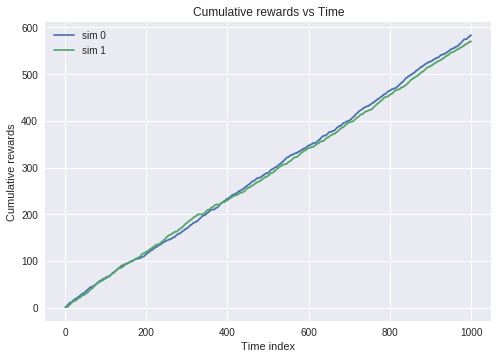

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


class adSelector():

    def __init__(self, reward_matrix, values):
        self.N = reward_matrix.shape[0]
        self.T = reward_matrix.shape[1]
        self.num_sims = reward_matrix.shape[2]
        
        return


    # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.
    def select_ad(self):
        
        
        return random.randrange(N)



def test_algorithm(algo, reward_matrix):

    N = reward_matrix.shape[0]
    T = reward_matrix.shape[1]
    num_sims = reward_matrix.shape[2]
    cumulative_rewards = np.zeros((num_sims,T))



    for sim in range(num_sims):
        for t in range(T):
            chosen_ad = algo.select_ad()
            reward = reward_matrix[chosen_ad,t,sim]

            if t == 0:
                cumulative_rewards[sim,t] = reward
            else:
                cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward

    #print(cumulative_rewards)
    return cumulative_rewards


# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
N = 3
T = 1000
num_sims = 2
reward_matrix = np.zeros((N,T,num_sims))
random.seed(0)

for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]


# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix)

print(results[:,T-1])
#print(results)


# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))
    
plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()